# Import movie files

In [1]:
import pandas as pd
import datetime
import numpy as np
import re

In [2]:
movie_file = 'movies2010_2016.csv'
plot_file = 'plots2010_2016.csv'
actor_file = 'actors2010_2016.csv'
director_file = 'directors2010_2016.csv'

In [3]:
movie_df = pd.read_csv(movie_file)
plot_df = pd.read_csv(plot_file)
actor_df = pd.read_csv(actor_file)
director_df = pd.read_csv(director_file)

In [4]:
print movie_df.columns.values
print "---------------------------------------------------------------------------"
print movie_df[:4]

['length' 'based_on' 'box_office' 'budget' 'cinematography' 'country'
 'director' 'distributor' 'editor' 'language' 'music' 'narration'
 'producer' 'screenplay' 'starring' 'story' 'written_by' 'site' 'title'
 'studio' 'revenues' 'check_rev' 'costs' 'check_costs' 'release_dates'
 'release_year' 'release_month' 'release_day' 'stars_list' 'directors_list']
---------------------------------------------------------------------------
           length                                          based_on  \
0      93 minutes  Between a Rock and a Hard Place\rby Aron Ralston   
1      80 minutes                                               NaN   
2  119 minutes[1]  The A-Team\rby Stephen J. Cannell and Frank Lupo   
3     109 minutes                                               NaN   

          box_office               budget  \
0   $60.7 million[2]       $18 million[2]   
1          $100,280          $2.5 million   
2  $177.2 million[3]  $110��million[2][3]   
3         $96,868[2]            

In [5]:
print plot_df.columns.values
print "---------------------------------------------------------------------------"
print plot_df[:2]

['site' 'plot']
---------------------------------------------------------------------------
                                                site  \
0  https://en.wikipedia.org/wiki/10_Cloverfield_Lane   
1      https://en.wikipedia.org/wiki/11-11-11_(film)   

                                                plot  
0  Following an argument with her fianc̩, Michell...  
1  The film starts with a dream sequence depictin...  


In [6]:
print actor_df.columns.values
print "---------------------------------------------------------------------------"
print actor_df[:2]

['actor_name' 'movies' 'revenues' 'costs' 'gross_profit' 'return' 'count']
---------------------------------------------------------------------------
        actor_name                                             movies  \
0    Lamman Rucker  [https://en.wikipedia.org/wiki/Why_Did_I_Get_M...   
1  Finley Jacobsen  [https://en.wikipedia.org/wiki/Olympus_Has_Fal...   

    revenues     costs  gross_profit    return  count  
0   60095852  20000000      10047926  0.502396      1  
1  161000000  70000000      10500000  0.150000      1  


In [7]:
print director_df.columns.values
print "---------------------------------------------------------------------------"
print director_df[:2]

['director_name' 'movies' 'revenues' 'costs' 'gross_profit' 'return'
 'count']
---------------------------------------------------------------------------
                             director_name  \
0                                      NaN   
1  \r\r\rPierre Coffin\rChris Renaud\r\r\r   

                                              movies    revenues      costs  \
0  [https://en.wikipedia.org/wiki/The_Perfect_Gam...           0          0   
1  [https://en.wikipedia.org/wiki/Despicable_Me, ...  1629300000  207000000   

   gross_profit    return  count  
0             0       NaN      3  
1     607650000  2.935507      3  


In [8]:
movie_list_df = movie_df.merge(plot_df, on=[u'site'])

In [9]:
print movie_list_df.columns.values
print "---------------------------------------------------------------------------"
print movie_list_df[:2]

['length' 'based_on' 'box_office' 'budget' 'cinematography' 'country'
 'director' 'distributor' 'editor' 'language' 'music' 'narration'
 'producer' 'screenplay' 'starring' 'story' 'written_by' 'site' 'title'
 'studio' 'revenues' 'check_rev' 'costs' 'check_costs' 'release_dates'
 'release_year' 'release_month' 'release_day' 'stars_list' 'directors_list'
 'plot']
---------------------------------------------------------------------------
       length                                          based_on  \
0  93 minutes  Between a Rock and a Hard Place\rby Aron Ralston   
1  80 minutes                                               NaN   

         box_office          budget  \
0  $60.7 million[2]  $18 million[2]   
1         $100,280     $2.5 million   

                                      cinematography  \
0    \r\r\rAnthony Dod Mantle\rEnrique Chediak\r\r\r   
1  Reed Cowan\rSteven Greenstreet\rMark Barr\rMar...   

                                     country                        dir

# Clean data

### Replace nulls in text columns with empty string (otherwise sometimes causes error)

In [10]:
movie_list_df['based_on'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['cinematography'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['country'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['director'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['distributor'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['editor'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['language'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['language'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['music'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['narration'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['producer'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['screenplay'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['starring'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['story'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['written_by'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['studio'].replace(to_replace=np.nan, value="", inplace=True)
movie_list_df['plot'].replace(to_replace=np.nan, value="", inplace=True)

### Convert to numeric values

#### Revenue

In [11]:
revenue_arr = []
for index, row in movie_list_df.iterrows():
    try:
        revenue = float(row['revenues'])
    except:
        revenue = np.nan
    revenue_arr.append(revenue)

movie_list_df['revenues_clean'] = revenue_arr
print movie_list_df['revenues_clean']

0         60700000
1           100280
2        177200000
3            96868
4       1025000000
5       1025000000
6           644535
7         50500000
8         67900000
9         77500000
10       329400000
11        16600000
12       157107755
13       136300000
14        36400000
15        21300000
16        89700000
17        28200000
18         1100000
19          176865
20       112500000
21       200700000
22        48190704
23       415700000
24       419700000
25         7875862
26       493200000
27       493200000
28        41000000
29          189416
           ...    
1393     212000000
1394      45200000
1395       2600000
1396     160400000
1397       2250000
1398           NaN
1399     182400000
1400     285600000
1401     119500000
1402      29200000
1403     172600000
1404      16500000
1405      23100000
1406     151600000
1407      23600000
1408       6300000
1409     161500000
1410      29400000
1411      81700000
1412      74800000
1413       2100000
1414       1

#### Length

In [12]:
length_arr = []
for index, row in movie_list_df.iterrows():
    try:
        length = re.sub("[^0-9]+", "", row['length'])
        length = int(length)
    except:
        length = np.nan
    length_arr.append(length)

movie_list_df['length_clean'] = length_arr
print movie_list_df['length_clean']

0         93
1         80
2       1191
3        109
4        108
5        108
6        101
7        881
8        105
9        104
10      1081
11      1121
12      1171
13       111
14       132
15        95
16       119
17       109
18       108
19       118
20        82
21        87
22        99
23       115
24       150
25      1041
26       106
27       106
28       118
29       118
        ... 
1393    1231
1394     891
1395    1031
1396    1331
1397     128
1398     207
1399      87
1400    1271
1401    1071
1402     941
1403    1121
1404    1201
1405     921
1406    1281
1407     962
1408      92
1409    1181
1410    1051
1411     991
1412    1031
1413    1121
1414    1081
1415    1211
1416     921
1417    1074
1418    1331
1419    1151
1420    1081
1421     107
1422    1282
Name: length_clean, dtype: object


#### Cost

In [13]:
cost_arr = []
for index, row in movie_list_df.iterrows():
    try:
        cost = float(row['costs'])
    except:
        cost = np.nan
    cost_arr.append(cost)

movie_list_df['costs_clean'] = cost_arr
print movie_list_df['costs_clean']

0        18000000
1         2500000
2       110000000
3             NaN
4       150000000
5       150000000
6        20000000
7        20000000
8        20000000
9        35000000
10       13000000
11        1000000
12       80000000
13       40000000
14       17000000
15        2000000
16       55000000
17       26000000
18       12500000
19            NaN
20       85000000
21       60000000
22       44000000
23      155000000
24      225000000
25        6000000
26      125000000
27      125000000
28       15000000
29            NaN
          ...    
1393     35000000
1394      5000000
1395     10000000
1396    108000000
1397      2000000
1398          NaN
1399     70000000
1400    110000000
1401    156000000
1402     25000000
1403     45000000
1404      8500000
1405      8500000
1406     44000000
1407      9900000
1408     10000000
1409     60000000
1410     40000000
1411      9000000
1412     20000000
1413      1500000
1414          NaN
1415     75000000
1416          NaN
1417    15

### View results

In [14]:
print movie_list_df.columns.values
print "---------------------------------------------------------------------------"
print movie_list_df[:2]

['length' 'based_on' 'box_office' 'budget' 'cinematography' 'country'
 'director' 'distributor' 'editor' 'language' 'music' 'narration'
 'producer' 'screenplay' 'starring' 'story' 'written_by' 'site' 'title'
 'studio' 'revenues' 'check_rev' 'costs' 'check_costs' 'release_dates'
 'release_year' 'release_month' 'release_day' 'stars_list' 'directors_list'
 'plot' 'revenues_clean' 'length_clean' 'costs_clean']
---------------------------------------------------------------------------
       length                                          based_on  \
0  93 minutes  Between a Rock and a Hard Place\rby Aron Ralston   
1  80 minutes                                                     

         box_office          budget  \
0  $60.7 million[2]  $18 million[2]   
1         $100,280     $2.5 million   

                                      cinematography  \
0    \r\r\rAnthony Dod Mantle\rEnrique Chediak\r\r\r   
1  Reed Cowan\rSteven Greenstreet\rMark Barr\rMar...   

                         

# Derive additional features

### Add release week and day of week

In [15]:
week_arr = []
day_of_week_arr = []
for index, row in movie_list_df.iterrows():
    try:
        release_year = int(row['release_year'])
        release_month = int(row['release_month'])
        release_day = int(row['release_day'].split("-")[0])
        release_week = datetime.date(release_year, release_month, release_day).isocalendar()[1]
        release_day_of_week = datetime.datetime.weekday(datetime.datetime.strptime(str(release_year)+"-"+str(release_month)+"-"+str(release_day), "%Y-%m-%d"))
    except:
        release_week = np.nan   
        release_day_of_week = np.nan
    day_of_week_arr.append(release_day_of_week)
    week_arr.append(release_week)

movie_list_df['release_week'] = week_arr
movie_list_df['release_day_of_week'] = day_of_week_arr

print movie_list_df[['release_week', 'release_day_of_week']]

      release_week  release_day_of_week
0                1                    4
1               24                    4
2               23                    4
3               29                    4
4                9                    4
5                9                    4
6               48                    4
7               37                    4
8               35                    2
9               16                    4
10              48                    4
11               2                    4
12               2                    4
13              11                    4
14               9                    4
15              38                    4
16              47                    2
17              39                    4
18               4                    4
19              18                    4
20              30                    4
21              27                    2
22              30                    4
23              49                    4


### Combine writing categories

In [16]:
movie_list_df['writer'] = movie_list_df['screenplay'] + movie_list_df['written_by']
print movie_list_df['writer']

0                  \r\r\rDanny Boyle\rSimon Beaufoy\r\r\r
1                                              Reed Cowan
2       \r\r\rJoe Carnahan\rBrian Bloom\rSkip Woods\r\r\r
3                                     Michael J. Weithorn
4                                        Linda Woolverton
5                                        Linda Woolverton
6                           Marcus Hinchey\rMarc Smerling
7               \r\r\rChristopher Denk\rSteve Moore\r\r\r
8                                             Rowan Joff̩
9                                             Kate Angelo
10      \r\r\rMark Heyman\rAndres Heinz\rJohn McLaughl...
11      \r\r\rDerek Cianfrance\rCami Delavigne\rJoey C...
12                                            Gary Whitta
13                                            Sarah Thorp
14                                      Michael C. Martin
15                                         Chris Sparling
16                                           Steven Antin
17            

### Determine if adaptation

In [17]:
movie_list_df['adaptation'] = (movie_list_df['based_on'] == "").astype(int)
print movie_list_df['adaptation']

0       0
1       1
2       0
3       1
4       0
5       0
6       1
7       1
8       0
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      0
21      1
22      0
23      0
24      0
25      1
26      0
27      0
28      1
29      1
       ..
1393    0
1394    1
1395    1
1396    0
1397    0
1398    1
1399    1
1400    0
1401    0
1402    1
1403    0
1404    1
1405    0
1406    1
1407    1
1408    0
1409    0
1410    1
1411    0
1412    1
1413    0
1414    0
1415    0
1416    1
1417    1
1418    0
1419    1
1420    0
1421    0
1422    1
Name: adaptation, dtype: int64


### Add cast and crew

#### Actor
1. Retain top n results

2. Generate dummy variables and merge in to main dataframe

In [18]:
no_top_actor = 6
actor_col_arr = ["actor_" + str(i) for i in range(no_top_actor)]
actor_arr = []
for index, row in movie_list_df.iterrows():
    actor_list = filter(None, row['starring'].split("\r"))[:no_top_actor]
    actor_list_len = len(actor_list)
    if actor_list_len < no_top_actor:
        for i in range(no_top_actor):
            if i >= actor_list_len:
                actor_list.append("") 
    actor_arr.append(actor_list)

actor_arr = np.transpose(actor_arr)

for item in enumerate(actor_col_arr):
    movie_list_df[item[1]] = actor_arr[item[0]]

print movie_list_df[actor_col_arr]

                  actor_0             actor_1               actor_2  \
0            James Franco                                             
1                                                                     
2             Liam Neeson      Bradley Cooper          Jessica Biel   
3           Jenna Fischer     Chris O'Donnell          Rob Benedict   
4             Johnny Depp       Anne Hathaway  Helena Bonham Carter   
5             Johnny Depp       Anne Hathaway  Helena Bonham Carter   
6            Ryan Gosling       Kirsten Dunst        Frank Langella   
7             Justin Long   Hayden Panettiere         Dennis Hopper   
8          George Clooney    Violante Placido         Thekla Reuten   
9          Jennifer Lopez     Alex O'Loughlin  Eric Christian Olsen   
10        Natalie Portman      Vincent Cassel            Mila Kunis   
11           Ryan Gosling   Michelle Williams                         
12      Denzel Washington         Gary Oldman            Mila Kunis   
13    

In [19]:
actor_dummy_df = pd.get_dummies(movie_list_df[actor_col_arr])
actor_dummy_col_arr = list(actor_dummy_df.columns.values)
movie_list_df = movie_list_df.join(actor_dummy_df)
print movie_list_df[actor_dummy_col_arr]

      actor_0_  actor_0_A Tribe Called Quest  actor_0_AJ Michalka  \
0            0                             0                    0   
1            1                             0                    0   
2            0                             0                    0   
3            0                             0                    0   
4            0                             0                    0   
5            0                             0                    0   
6            0                             0                    0   
7            0                             0                    0   
8            0                             0                    0   
9            0                             0                    0   
10           0                             0                    0   
11           0                             0                    0   
12           0                             0                    0   
13           0                    

#### Cinematographer
1. Retain top n results

2. Generate dummy variables and merge in to main dataframe

In [20]:
no_top_cinematographer = 1
cinematographer_col_arr = ["cinematographer_" + str(i) for i in range(no_top_cinematographer)]
cinematographer_arr = []
for index, row in movie_list_df.iterrows():
    cinematographer_list = filter(None, row['cinematography'].split("\r"))[:no_top_cinematographer]
    cinematographer_list_len = len(cinematographer_list)
    if cinematographer_list_len < no_top_cinematographer:
        for i in range(no_top_cinematographer):
            if i >= cinematographer_list_len:
                cinematographer_list.append("") 
    cinematographer_arr.append(cinematographer_list)

cinematographer_arr = np.transpose(cinematographer_arr)

for item in enumerate(cinematographer_col_arr):
    movie_list_df[item[1]] = cinematographer_arr[item[0]]

print movie_list_df[cinematographer_col_arr]

                cinematographer_0
0              Anthony Dod Mantle
1                      Reed Cowan
2                     Mauro Fiore
3                                
4                  Dariusz Wolski
5                  Dariusz Wolski
6                 Michael Seresin
7                                
8                     Martin Ruhe
9             Xavier P̩rez Grobet
10              Matthew Libatique
11                  Andrij Parekh
12                    Don Burgess
13               Oliver Bokelberg
14                Patrick Murguia
15                    Eduard Grau
16                  Bojan Bazelli
17                 Hagen Bodanski
18                     Adam Swica
19                 Maryse Alberti
20                  Steven Poster
21                    Julio Macat
22                Enrique Chediak
23                 Dante Spinotti
24         Karl Walter Lindenlaub
25                  Vanja Cernjul
26             Peter Menzies, Jr.
27             Peter Menzies, Jr.
28            

In [21]:
cinematographer_dummy_df = pd.get_dummies(movie_list_df[cinematographer_col_arr])
cinematographer_dummy_col_arr = list(cinematographer_dummy_df.columns.values)
movie_list_df = movie_list_df.join(cinematographer_dummy_df)
print movie_list_df[cinematographer_dummy_col_arr]

      cinematographer_0_  cinematographer_0_Aaron Morton  \
0                      0                               0   
1                      0                               0   
2                      0                               0   
3                      1                               0   
4                      0                               0   
5                      0                               0   
6                      0                               0   
7                      1                               0   
8                      0                               0   
9                      0                               0   
10                     0                               0   
11                     0                               0   
12                     0                               0   
13                     0                               0   
14                     0                               0   
15                     0                

#### Director
1. Retain top n results

2. Generate dummy variables and merge in to main dataframe

In [22]:
no_top_director = 1
director_col_arr = ["director_" + str(i) for i in range(no_top_director)]
director_arr = []
for index, row in movie_list_df.iterrows():
    director_list = filter(None, row['director'].split("\r"))[:no_top_director]
    director_list_len = len(director_list)
    if director_list_len < no_top_director:
        for i in range(no_top_director):
            if i >= director_list_len:
                director_list.append("") 
    director_arr.append(director_list)

director_arr = np.transpose(director_arr)

for item in enumerate(director_col_arr):
    movie_list_df[item[1]] = director_arr[item[0]]

print movie_list_df[director_col_arr]

               director_0
0             Danny Boyle
1              Reed Cowan
2            Joe Carnahan
3     Michael J. Weithorn
4              Tim Burton
5              Tim Burton
6          Andrew Jarecki
7            Anthony Bell
8           Anton Corbijn
9               Alan Poul
10       Darren Aronofsky
11       Derek Cianfrance
12    The Hughes brothers
13           Andy Tennant
14          Antoine Fuqua
15         Rodrigo Cort̩s
16           Steven Antin
17       Christian Alvart
18    George Hickenlooper
19            Alex Gibney
20            Brad Peyton
21      Lawrence Guterman
22            Burr Steers
23          Michael Apted
24         Andrew Adamson
25     Raymond De Felitta
26        Louis Leterrier
27        Louis Leterrier
28          Desmond Davis
29            Alex Gibney
...                   ...
1393       Sharon Maguire
1394         Adam Wingard
1395  Michael John Warren
1396        Antoine Fuqua
1397         John Sturges
1398       Akira Kurosawa
1399     Nic

In [23]:
director_dummy_df = pd.get_dummies(movie_list_df[director_col_arr])
director_dummy_col_arr = list(director_dummy_df.columns.values)
movie_list_df = movie_list_df.join(director_dummy_df)
print movie_list_df[director_dummy_col_arr]

      director_0_  director_0_Aaron Schneider  director_0_Abe Sylvia  \
0               0                           0                      0   
1               0                           0                      0   
2               0                           0                      0   
3               0                           0                      0   
4               0                           0                      0   
5               0                           0                      0   
6               0                           0                      0   
7               0                           0                      0   
8               0                           0                      0   
9               0                           0                      0   
10              0                           0                      0   
11              0                           0                      0   
12              0                           0                   

#### Distributor
1. Retain top n results

2. Generate dummy variables and merge in to main dataframe

In [24]:
no_top_distributor = 1
distributor_col_arr = ["distributor_" + str(i) for i in range(no_top_distributor)]
distributor_arr = []
for index, row in movie_list_df.iterrows():
    distributor_list = filter(None, row['distributor'].split("\r"))[:no_top_distributor]
    distributor_list_len = len(distributor_list)
    if distributor_list_len < no_top_distributor:
        for i in range(no_top_distributor):
            if i >= distributor_list_len:
                distributor_list.append("") 
    distributor_arr.append(distributor_list)

distributor_arr = np.transpose(distributor_arr)

for item in enumerate(distributor_col_arr):
    movie_list_df[item[1]] = distributor_arr[item[0]]

print movie_list_df[distributor_col_arr]

                                 distributor_0
0     Fox Searchlight Pictures (United States)
1                           Red Flag Releasing
2                             20th Century Fox
3                       Freestyle Releasing[1]
4                          Walt Disney Studios
5                          Walt Disney Studios
6                            Magnolia Pictures
7                              Lionsgate Films
8                               Focus Features
9                                    CBS Films
10                    Fox Searchlight Pictures
11                       The Weinstein Company
12                 Warner Bros. Pictures (USA)
13                           Columbia Pictures
14                              Overture Films
15                                   Lionsgate
16                                 Screen Gems
17                          Paramount Pictures
18                  Art Takes Over Films (ATO)
19                           Magnolia Pictures
20           

In [25]:
distributor_dummy_df = pd.get_dummies(movie_list_df[distributor_col_arr])
distributor_dummy_col_arr = list(distributor_dummy_df.columns.values)
movie_list_df = movie_list_df.join(distributor_dummy_df)
print movie_list_df[distributor_dummy_col_arr]

      distributor_0_  distributor_0_20th Century Fox  \
0                  0                               0   
1                  0                               0   
2                  0                               1   
3                  0                               0   
4                  0                               0   
5                  0                               0   
6                  0                               0   
7                  0                               0   
8                  0                               0   
9                  0                               0   
10                 0                               0   
11                 0                               0   
12                 0                               0   
13                 0                               0   
14                 0                               0   
15                 0                               0   
16                 0                            

#### Editor
1. Retain top n results

2. Generate dummy variables and merge in to main dataframe

In [26]:
no_top_editor = 1
editor_col_arr = ["editor_" + str(i) for i in range(no_top_editor)]
editor_arr = []
for index, row in movie_list_df.iterrows():
    editor_list = filter(None, row['editor'].split("\r"))[:no_top_editor]
    editor_list_len = len(editor_list)
    if editor_list_len < no_top_editor:
        for i in range(no_top_editor):
            if i >= editor_list_len:
                editor_list.append("") 
    editor_arr.append(editor_list)

editor_arr = np.transpose(editor_arr)

for item in enumerate(editor_col_arr):
    movie_list_df[item[1]] = editor_arr[item[0]]

print movie_list_df[editor_col_arr]

                     editor_0
0                  Jon Harris
1          Steven Greenstreet
2                Roger Barton
3                            
4              Chris Lebenzon
5              Chris Lebenzon
6            David Rosenbloom
7           Joseph L. Campana
8                Andrew Hulme
9     Priscilla Nedd-Friendly
10            Andrew Weisblum
11                 Jim Helton
12                Cindy Mollo
13                Troy Takaki
14           Barbara Tulliver
15             Rodrigo Cort̩s
16              Virginia Katz
17             Mark Goldblatt
18          William Steinkamp
19             Alison Ellwood
20               Julie Rogers
21             Rick W. Finney
22           Padraic McKinley
23                Rick Shaine
24             Sim Evan-Jones
25              David Leonard
26          Vincent Tabaillon
27          Vincent Tabaillon
28                Timothy Gee
29              Plummy Tucker
...                       ...
1393       Melanie Ann Oliver
1394      

In [27]:
editor_dummy_df = pd.get_dummies(movie_list_df[editor_col_arr])
editor_dummy_col_arr = list(editor_dummy_df.columns.values)
movie_list_df = movie_list_df.join(editor_dummy_df)
print movie_list_df[editor_dummy_col_arr]

      editor_0_  editor_0_Aaron Schneider  editor_0_Aaron Yanes  \
0             0                         0                     0   
1             0                         0                     0   
2             0                         0                     0   
3             1                         0                     0   
4             0                         0                     0   
5             0                         0                     0   
6             0                         0                     0   
7             0                         0                     0   
8             0                         0                     0   
9             0                         0                     0   
10            0                         0                     0   
11            0                         0                     0   
12            0                         0                     0   
13            0                         0                     

#### Music
1. Retain top n results

2. Generate dummy variables and merge in to main dataframe

In [28]:
no_top_music = 1
music_col_arr = ["music_" + str(i) for i in range(no_top_music)]
music_arr = []
for index, row in movie_list_df.iterrows():
    music_list = filter(None, row['music'].split("\r"))[:no_top_music]
    music_list_len = len(music_list)
    if music_list_len < no_top_music:
        for i in range(no_top_music):
            if i >= music_list_len:
                music_list.append("") 
    music_arr.append(music_list)

music_arr = np.transpose(music_arr)

for item in enumerate(music_col_arr):
    movie_list_df[item[1]] = music_arr[item[0]]

print movie_list_df[music_col_arr]

                     music_0
0               A. R. Rahman
1               Thomas Chase
2             Alan Silvestri
3                           
4               Danny Elfman
5               Danny Elfman
6               Rob Simonsen
7                Chris Bacon
8         Herbert Gr̦nemeyer
9              Stephen Trask
10             Clint Mansell
11              Grizzly Bear
12              Atticus Ross
13             George Fenton
14            Marcelo Zarvos
15             V�_ctor Reyes
16           Christophe Beck
17             Michl Britsch
18        Jonathan Goldsmith
19             David Robbins
20      Christopher Lennertz
21               John Debney
22                Rolfe Kent
23              David Arnold
24    Harry Gregson-Williams
25        Jan A.P. Kaczmarek
26             Ramin Djawadi
27             Ramin Djawadi
28        Laurence Rosenthal
29              Peter Nashel
...                      ...
1393         Craig Armstrong
1394            Adam Wingard
1395         H

In [29]:
music_dummy_df = pd.get_dummies(movie_list_df[music_col_arr])
music_dummy_col_arr = list(music_dummy_df.columns.values)
movie_list_df = movie_list_df.join(music_dummy_df)
print movie_list_df[music_dummy_col_arr]

      music_0_  music_0_A. R. Rahman  music_0_A. R. Rahman[1]  \
0            0                     1                        0   
1            0                     0                        0   
2            0                     0                        0   
3            1                     0                        0   
4            0                     0                        0   
5            0                     0                        0   
6            0                     0                        0   
7            0                     0                        0   
8            0                     0                        0   
9            0                     0                        0   
10           0                     0                        0   
11           0                     0                        0   
12           0                     0                        0   
13           0                     0                        0   
14           0           

#### Producer
1. Retain top n results

2. Generate dummy variables and merge in to main dataframe

In [30]:
no_top_producer = 4
producer_col_arr = ["producer_" + str(i) for i in range(no_top_producer)]
producer_arr = []
for index, row in movie_list_df.iterrows():
    producer_list = filter(None, row['producer'].split("\r"))[:no_top_producer]
    producer_list_len = len(producer_list)
    if producer_list_len < no_top_producer:
        for i in range(no_top_producer):
            if i >= producer_list_len:
                producer_list.append("") 
    producer_arr.append(producer_list)

producer_arr = np.transpose(producer_arr)

for item in enumerate(producer_col_arr):
    movie_list_df[item[1]] = producer_arr[item[0]]

print movie_list_df[producer_col_arr]

                  producer_0            producer_1             producer_2  \
0                Danny Boyle      Christian Colson          John Smithson   
1                 Reed Cowan    Steven Greenstreet          Bruce Bastian   
2         Stephen J. Cannell            Tony Scott           Spike Seldin   
3                Dena Hysell           Joe Gressis    Michael J. Weithorn   
4          Richard D. Zanuck              Joe Roth           Suzanne Todd   
5          Richard D. Zanuck              Joe Roth           Suzanne Todd   
6             Andrew Jarecki        Michael London        Bruna Papandrea   
7              Ken Katsumoto           Steve Moore           Richard Rich   
8                 Anne Carey            Jill Green            Ann Wingate   
9                Steve Tisch            Todd Black       Jason Blumenthal   
10            Scott Franklin            Ari Handel           Mike Medavoy   
11            Lynette Howell         Alex Orlovsky         Jamie Patricof   

In [31]:
producer_dummy_df = pd.get_dummies(movie_list_df[producer_col_arr])
producer_dummy_col_arr = list(producer_dummy_df.columns.values)
movie_list_df = movie_list_df.join(producer_dummy_df)
print movie_list_df[producer_dummy_col_arr]

      producer_0_  producer_0_50 Cent  producer_0_A Tribe Called Quest  \
0               0                   0                                0   
1               0                   0                                0   
2               0                   0                                0   
3               0                   0                                0   
4               0                   0                                0   
5               0                   0                                0   
6               0                   0                                0   
7               0                   0                                0   
8               0                   0                                0   
9               0                   0                                0   
10              0                   0                                0   
11              0                   0                                0   
12              0                   0 

#### Writer
1. Retain top n results

2. Generate dummy variables and merge in to main dataframe

In [32]:
no_top_writer = 3
writer_col_arr = ["writer_" + str(i) for i in range(no_top_writer)]
writer_arr = []
for index, row in movie_list_df.iterrows():
    writer_list = filter(None, row['writer'].split("\r"))[:no_top_writer]
    writer_list_len = len(writer_list)
    if writer_list_len < no_top_writer:
        for i in range(no_top_writer):
            if i >= writer_list_len:
                writer_list.append("") 
    writer_arr.append(writer_list)

writer_arr = np.transpose(writer_arr)

for item in enumerate(writer_col_arr):
    movie_list_df[item[1]] = writer_arr[item[0]]

print movie_list_df[writer_col_arr]

                      writer_0            writer_1             writer_2
0                  Danny Boyle       Simon Beaufoy                     
1                   Reed Cowan                                         
2                 Joe Carnahan         Brian Bloom           Skip Woods
3          Michael J. Weithorn                                         
4             Linda Woolverton                                         
5             Linda Woolverton                                         
6               Marcus Hinchey       Marc Smerling                     
7             Christopher Denk         Steve Moore                     
8                  Rowan Joff̩                                         
9                  Kate Angelo                                         
10                 Mark Heyman        Andres Heinz      John McLaughlin
11            Derek Cianfrance      Cami Delavigne          Joey Curtis
12                 Gary Whitta                                  

In [33]:
writer_dummy_df = pd.get_dummies(movie_list_df[writer_col_arr])
writer_dummy_col_arr = list(writer_dummy_df.columns.values)
movie_list_df = movie_list_df.join(writer_dummy_df)
print movie_list_df[writer_dummy_col_arr]

      writer_0_  writer_0_Aaron Guzikowski  writer_0_Aaron Sorkin  \
0             0                          0                      0   
1             0                          0                      0   
2             0                          0                      0   
3             0                          0                      0   
4             0                          0                      0   
5             0                          0                      0   
6             0                          0                      0   
7             0                          0                      0   
8             0                          0                      0   
9             0                          0                      0   
10            0                          0                      0   
11            0                          0                      0   
12            0                          0                      0   
13            0                   

#### Story
1. Retain top n results

2. Generate dummy variables and merge in to main dataframe

In [34]:
no_top_story = 1
story_col_arr = ["story_" + str(i) for i in range(no_top_story)]
story_arr = []
for index, row in movie_list_df.iterrows():
    story_list = filter(None, row['story'].split("\r"))[:no_top_story]
    story_list_len = len(story_list)
    if story_list_len < no_top_story:
        for i in range(no_top_story):
            if i >= story_list_len:
                story_list.append("") 
    story_arr.append(story_list)

story_arr = np.transpose(story_arr)

for item in enumerate(story_col_arr):
    movie_list_df[item[1]] = story_arr[item[0]]

print movie_list_df[story_col_arr]

                     story_0
0                           
1                           
2                           
3                           
4                           
5                           
6                           
7                  Ben Gluck
8                           
9                           
10              Andres Heinz
11                          
12                          
13                          
14                          
15                          
16                          
17                          
18                          
19                          
20                          
21                          
22                          
23                          
24                          
25                          
26                          
27                          
28                          
29                          
...                      ...
1393                        
1394                        
1395          

In [35]:
story_dummy_df = pd.get_dummies(movie_list_df[story_col_arr])
story_dummy_col_arr = list(story_dummy_df.columns.values)
movie_list_df = movie_list_df.join(story_dummy_df)
print movie_list_df[story_dummy_col_arr]

      story_0_  story_0_Abby Kohn  story_0_Adam McKay  story_0_Ahmet Zappa  \
0            1                  0                   0                    0   
1            1                  0                   0                    0   
2            1                  0                   0                    0   
3            1                  0                   0                    0   
4            1                  0                   0                    0   
5            1                  0                   0                    0   
6            1                  0                   0                    0   
7            0                  0                   0                    0   
8            1                  0                   0                    0   
9            1                  0                   0                    0   
10           0                  0                   0                    0   
11           1                  0                   0           

#### Studio
1. Retain top n results

2. Generate dummy variables and merge in to main dataframe

In [36]:
no_top_studio = 5
studio_col_arr = ["studio_" + str(i) for i in range(no_top_studio)]
studio_arr = []
for index, row in movie_list_df.iterrows():
    studio_list = filter(None, row['studio'].split("\r"))[:no_top_studio]
    studio_list_len = len(studio_list)
    if studio_list_len < no_top_studio:
        for i in range(no_top_studio):
            if i >= studio_list_len:
                studio_list.append("") 
    studio_arr.append(studio_list)

studio_arr = np.transpose(studio_arr)

for item in enumerate(studio_col_arr):
    movie_list_df[item[1]] = studio_arr[item[0]]

print movie_list_df[studio_col_arr]

                            studio_0                         studio_1  \
0                              Path̩            Everest Entertainment   
1             David v. Goliath Films                                    
2                 Dune Entertainment              Top Cow Productions   
3     Secret Handshake Entertainment                                    
4               Walt Disney Pictures                       Roth Films   
5               Walt Disney Pictures                       Roth Films   
6                                                                       
7        Crest Animation Productions                                    
8                       This is that              Smokehouse Pictures   
9                     Escape Artists                                    
10              Cross Creek Pictures                 Phoenix Pictures   
11                Hunting Lane Films                 Silverwood Films   
12               Alcon Entertainment               

In [37]:
studio_dummy_df = pd.get_dummies(movie_list_df[studio_col_arr])
studio_dummy_col_arr = list(studio_dummy_df.columns.values)
movie_list_df = movie_list_df.join(studio_dummy_df)
print movie_list_df[studio_dummy_col_arr]

      studio_0_  studio_0_10 West Studios  studio_0_1492 Pictures  \
0             0                         0                       0   
1             0                         0                       0   
2             0                         0                       0   
3             0                         0                       0   
4             0                         0                       0   
5             0                         0                       0   
6             1                         0                       0   
7             0                         0                       0   
8             0                         0                       0   
9             0                         0                       0   
10            0                         0                       0   
11            0                         0                       0   
12            0                         0                       0   
13            0                   

### View results

In [38]:
print movie_list_df.columns.values
print "---------------------------------------------------------------------------"
print movie_list_df[:2]

['length' 'based_on' 'box_office' ..., 'studio_4_ZHI Media'
 'studio_4_Zaftig Films' 'studio_4_Zanagar Films']
---------------------------------------------------------------------------
       length                                          based_on  \
0  93 minutes  Between a Rock and a Hard Place\rby Aron Ralston   
1  80 minutes                                                     

         box_office          budget  \
0  $60.7 million[2]  $18 million[2]   
1         $100,280     $2.5 million   

                                      cinematography  \
0    \r\r\rAnthony Dod Mantle\rEnrique Chediak\r\r\r   
1  Reed Cowan\rSteven Greenstreet\rMark Barr\rMar...   

                                     country                        director  \
0  \r\r\rUnited Kingdom\rUnited States\r\r\r                     Danny Boyle   
1                              United States  Reed Cowan\rSteven Greenstreet   

                                         distributor  \
0  \r\r\rFox Searchlight Pi

# Decompose plots into topics using Non-Negative Matrix Factorization (NNMF), Latent Dirichlet Allocation (LDA)

In [39]:
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
no_word_features = 10000
no_topics = 100

## Clean up plots

In [40]:
print movie_list_df['plot'][1]
print "---------------------------------------------------------------------------"
print movie_list_df['plot'][4]

Director Reed Cowan, who is a former Mormon missionary, "planned on making a film about gay teen homelessness and suicide in Utah, but switched his focus to Mormon ideology because of how it contributes to the homophobia that causes these problems".[1] The film focuses on the wealth and power of the The Church of Jesus Christ of Latter-day Saints, and how the Church uses the National Organization for Marriage to advocate for denial of rights to lesbian, gay, bisexual, and transgender (LGBT) Americans. It states that LDS Church leader Thomas S. Monson asked to ensure the passage of the controversial California Proposition 8. It also states that many homeless people in Utah are LGBT teens who were abandoned by their Mormon parents. According to the New York Times, the film "uncovers the classified church documents and the largely concealed money trail of Mormon contributions that paid for a high-powered campaign to pass Proposition 8", noting that "Mormons raised an estimated $22 million

### Remove special characters

In [41]:
movie_list_df['plot_clean'] = movie_list_df['plot'].replace(to_replace='\[[0-9]+\]', value=" ", regex=True)
movie_list_df['plot_clean'].replace(to_replace='[^A-Za-z0-9]+', value=" ", inplace=True, regex=True)

### Use NLTK to remove proper nouns

### View results

In [42]:
print movie_list_df['plot_clean'][1]
print "---------------------------------------------------------------------------"
print movie_list_df['plot_clean'][4]

Director Reed Cowan who is a former Mormon missionary planned on making a film about gay teen homelessness and suicide in Utah but switched his focus to Mormon ideology because of how it contributes to the homophobia that causes these problems The film focuses on the wealth and power of the The Church of Jesus Christ of Latter day Saints and how the Church uses the National Organization for Marriage to advocate for denial of rights to lesbian gay bisexual and transgender LGBT Americans It states that LDS Church leader Thomas S Monson asked to ensure the passage of the controversial California Proposition 8 It also states that many homeless people in Utah are LGBT teens who were abandoned by their Mormon parents According to the New York Times the film uncovers the classified church documents and the largely concealed money trail of Mormon contributions that paid for a high powered campaign to pass Proposition 8 noting that Mormons raised an estimated 22 million for the cause When The W

In [43]:
print movie_list_df.columns.values
print "---------------------------------------------------------------------------"
print movie_list_df[:2]

['length' 'based_on' 'box_office' ..., 'studio_4_Zaftig Films'
 'studio_4_Zanagar Films' 'plot_clean']
---------------------------------------------------------------------------
       length                                          based_on  \
0  93 minutes  Between a Rock and a Hard Place\rby Aron Ralston   
1  80 minutes                                                     

         box_office          budget  \
0  $60.7 million[2]  $18 million[2]   
1         $100,280     $2.5 million   

                                      cinematography  \
0    \r\r\rAnthony Dod Mantle\rEnrique Chediak\r\r\r   
1  Reed Cowan\rSteven Greenstreet\rMark Barr\rMar...   

                                     country                        director  \
0  \r\r\rUnited Kingdom\rUnited States\r\r\r                     Danny Boyle   
1                              United States  Reed Cowan\rSteven Greenstreet   

                                         distributor  \
0  \r\r\rFox Searchlight Pictures (

## Fit NNMF model

### Vectorize plots for NNMF using tf-idf
Max number of features is number of words for the "bag of words"

In [44]:
nnmf_tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_word_features, stop_words='english')
nnmf_tfidf = nnmf_tfidf_vectorizer.fit_transform(movie_list_df['plot_clean'])
nnmf_tfidf_feature_names = nnmf_tfidf_vectorizer.get_feature_names()
print nnmf_tfidf_feature_names

[u'00', u'000', u'03', u'07', u'10', u'100', u'11', u'112', u'113', u'12', u'13', u'14', u'15', u'150', u'16', u'17', u'17th', u'18', u'18th', u'19', u'1920s', u'1943', u'1944', u'1960s', u'1962', u'1964', u'1965', u'1969', u'1970', u'1973', u'1977', u'1978', u'1980', u'1980s', u'1983', u'1985', u'1986', u'1987', u'1988', u'1989', u'1991', u'1993', u'1996', u'1997', u'1999', u'20', u'200', u'2000', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006', u'2007', u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015', u'2016', u'2017', u'209', u'20th', u'21', u'21st', u'22', u'23', u'24', u'25', u'26', u'27', u'28', u'29', u'2nd', u'30', u'300', u'31', u'32', u'35', u'3d', u'40', u'400', u'41', u'42', u'43', u'45', u'47', u'48', u'4th', u'50', u'500', u'51', u'60', u'70', u'700', u'75', u'80', u'800', u'90', u'911', u'aa', u'aaron', u'aback', u'abalam', u'abandon', u'abandoned', u'abandoning', u'abandons', u'abbott', u'abby', u'abdomen', u'abduct', u'abducted', u'abducting

### Run NNMF model

In [45]:
nnmf_model = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(nnmf_tfidf)
nnmf_W = nnmf_model.transform(nnmf_tfidf)
nnmf_H = nnmf_model.components_

### Add full list of NNMF topic scores to dataframe

In [46]:
movie_list_df['nnmf_topic_scores'] = nnmf_W.tolist()

### Add top n NNMF topics to dataframe

In [47]:
no_top_n_nnmf_topics = 5
nnmf_topic_col_arr = ["nnmf_topic_" + str(i) for i in range(no_top_n_nnmf_topics)]
top_n_nnmf_topic_arr = []
for index, row in movie_list_df.iterrows():
    top_n_nnmf_topic_arr.append(np.array(row['nnmf_topic_scores']).argsort()[-1*no_top_n_nnmf_topics:][::-1])

top_n_nnmf_topic_arr = np.transpose(top_n_nnmf_topic_arr)
    
for topic in enumerate(nnmf_topic_col_arr):
    movie_list_df[topic[1]] = top_n_nnmf_topic_arr[topic[0]]

### View results

In [48]:
print movie_list_df.columns.values
print "---------------------------------------------------------------------------"
print movie_list_df[:2]

['length' 'based_on' 'box_office' ..., 'nnmf_topic_2' 'nnmf_topic_3'
 'nnmf_topic_4']
---------------------------------------------------------------------------
       length                                          based_on  \
0  93 minutes  Between a Rock and a Hard Place\rby Aron Ralston   
1  80 minutes                                                     

         box_office          budget  \
0  $60.7 million[2]  $18 million[2]   
1         $100,280     $2.5 million   

                                      cinematography  \
0    \r\r\rAnthony Dod Mantle\rEnrique Chediak\r\r\r   
1  Reed Cowan\rSteven Greenstreet\rMark Barr\rMar...   

                                     country                        director  \
0  \r\r\rUnited Kingdom\rUnited States\r\r\r                     Danny Boyle   
1                              United States  Reed Cowan\rSteven Greenstreet   

                                         distributor  \
0  \r\r\rFox Searchlight Pictures (United States)...

## Fit LDA Model

### Vectorize plots for LDA using tf

Max number of features is number of words for the "bag of words".

LDA can only use raw term counts for LDA because it is a probabilistic graphical model


In [49]:
lda_tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_word_features, stop_words='english')
lda_tf = lda_tf_vectorizer.fit_transform(movie_list_df['plot_clean'])
lda_tf_feature_names = lda_tf_vectorizer.get_feature_names()
print lda_tf_feature_names

[u'00', u'000', u'03', u'07', u'10', u'100', u'11', u'112', u'113', u'12', u'13', u'14', u'15', u'150', u'16', u'17', u'17th', u'18', u'18th', u'19', u'1920s', u'1943', u'1944', u'1960s', u'1962', u'1964', u'1965', u'1969', u'1970', u'1973', u'1977', u'1978', u'1980', u'1980s', u'1983', u'1985', u'1986', u'1987', u'1988', u'1989', u'1991', u'1993', u'1996', u'1997', u'1999', u'20', u'200', u'2000', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006', u'2007', u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015', u'2016', u'2017', u'209', u'20th', u'21', u'21st', u'22', u'23', u'24', u'25', u'26', u'27', u'28', u'29', u'2nd', u'30', u'300', u'31', u'32', u'35', u'3d', u'40', u'400', u'41', u'42', u'43', u'45', u'47', u'48', u'4th', u'50', u'500', u'51', u'60', u'70', u'700', u'75', u'80', u'800', u'90', u'911', u'aa', u'aaron', u'aback', u'abalam', u'abandon', u'abandoned', u'abandoning', u'abandons', u'abbott', u'abby', u'abdomen', u'abduct', u'abducted', u'abducting

### Run LDA model

In [50]:
lda_model = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(lda_tf)
lda_W = lda_model.transform(lda_tf)
lda_H = lda_model.components_

### Add LDA topics to main dataframe

In [51]:
movie_list_df['lda_topic_scores'] = lda_W.tolist()

### Add top n LDA topics to dataframe

In [52]:
no_top_n_lda_topics = 5
lda_topic_col_arr = ["lda_topic_" + str(i) for i in range(no_top_n_lda_topics)]
top_n_lda_topic_arr = []
for index, row in movie_list_df.iterrows():
    top_n_lda_topic_arr.append(np.array(row['lda_topic_scores']).argsort()[-1*no_top_n_lda_topics:][::-1])

top_n_lda_topic_arr = np.transpose(top_n_lda_topic_arr)
    
for topic in enumerate(lda_topic_col_arr):
    movie_list_df[topic[1]] = top_n_lda_topic_arr[topic[0]]

### View results

In [53]:
print movie_list_df.columns.values
print "---------------------------------------------------------------------------"
print movie_list_df[:2]

['length' 'based_on' 'box_office' ..., 'lda_topic_2' 'lda_topic_3'
 'lda_topic_4']
---------------------------------------------------------------------------
       length                                          based_on  \
0  93 minutes  Between a Rock and a Hard Place\rby Aron Ralston   
1  80 minutes                                                     

         box_office          budget  \
0  $60.7 million[2]  $18 million[2]   
1         $100,280     $2.5 million   

                                      cinematography  \
0    \r\r\rAnthony Dod Mantle\rEnrique Chediak\r\r\r   
1  Reed Cowan\rSteven Greenstreet\rMark Barr\rMar...   

                                     country                        director  \
0  \r\r\rUnited Kingdom\rUnited States\r\r\r                     Danny Boyle   
1                              United States  Reed Cowan\rSteven Greenstreet   

                                         distributor  \
0  \r\r\rFox Searchlight Pictures (United States)...   

# Display plot model results
Will display top associated words, top movies for each topic

In [54]:
no_top_words = 100
no_top_documents = 5

def display_topics(H, W, feature_names, titles, plots, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print "Topic %d:" % (topic_idx)
        print " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print "\nMovie: " + titles[doc_index]
            print "Plot:\n" + plots[doc_index] + "\n"
        print "---------------------------------------------------------------------------"

### NNMF

In [55]:
display_topics(nnmf_H, nnmf_W, nnmf_tfidf_feature_names, movie_list_df['title'], movie_list_df['plot'], no_top_words, no_top_documents)

Topic 0:
zoolander exploration explosives explosive explosions explosion exploring explores explore exploits expose exploding explodes explode explanation explains explaining explained expo exposed favorite extends extract extra extinguisher extinction extinct extent extensive extended exposes extend expression expressing expresses express exposure exposing explain expert experiments exhibits exiting exit exists existence exist exiled exile exhibit experimenting exhausted exercise executives executive execution executing executes exits exorcism exotic expand experimental experiment experiencing experiences experienced experience expensive expenses expendables expelled expedition expects expecting expected expectations extracted extraction extractor famous far fantasy fans fanny fang fancy fan family fallen families familiar fame falsely false falls fallon faraday farewell faris

Movie: La La Land
Plot:
Stuck in traffic on a crowded Los Angeles highway ("Another Day of Sun"), Mia (Emma 

### LDA

In [56]:
display_topics(lda_H, lda_W, lda_tf_feature_names, movie_list_df['title'], movie_list_df['plot'], no_top_words, no_top_documents)

Topic 0:
gru girls vector shrink moon ray nefario dr minions recital plan mr day perkins perseus agnes steal bank supervillain later ballet base steals ship zeus longer possession film park ends eventually action son theme pyramid fund marlena margo time edith trapped mother using successfully theft break dragged fortress makes note calibos stating unknown lair meeting 3d obtain hades lame io dream offer game look operations better encouraging freezing defeated decides able interrupt piggy shrinking stealing gods villains provide rigged carnival size immediately parts coming anger returned loan abandon warming pride revenge arrive blowing kidnapped explodes announces video pay just attendant

Movie: La La Land
Plot:
Stuck in traffic on a crowded Los Angeles highway ("Another Day of Sun"), Mia (Emma Stone), an on-studio (on the Warner Bros. lot) barista and aspiring actress, has a moment of road rage with Sebastian (Ryan Gosling), a struggling jazz pianist. Her subsequent audition goes 

# Build revenue prediction model

## Create model input arrays

### Build movie feature data frame 

Use either NNMF or LDA topic as needed

In [191]:
movie_prediction_features = ['costs_clean', 'length_clean', 'release_week', 'release_day_of_week', 'adaptation']
revenue_column = 'revenues_clean'

#movie_prediction_features += nnmf_topic_col_arr
movie_prediction_features += lda_topic_col_arr

movie_prediction_features += actor_dummy_col_arr
movie_prediction_features += cinematographer_dummy_col_arr
movie_prediction_features += director_dummy_col_arr
movie_prediction_features += distributor_dummy_col_arr
movie_prediction_features += editor_dummy_col_arr
movie_prediction_features += music_dummy_col_arr
movie_prediction_features += producer_dummy_col_arr
movie_prediction_features += writer_dummy_col_arr
movie_prediction_features += story_dummy_col_arr
movie_prediction_features += studio_dummy_col_arr

# add revenue here for cleaning below; will be dropped after
movie_prediction_features.append(revenue_column)

movie_feature_df = movie_list_df[movie_prediction_features]
print movie_feature_df.columns.values

['costs_clean' 'length_clean' 'release_week' ..., 'studio_4_Zaftig Films'
 'studio_4_Zanagar Films' 'revenues_clean']


### Filter out null values

In [192]:
print "Number of rows in feature dataframe before change = " + str(len(movie_feature_df))

movie_feature_df = movie_feature_df.dropna()

print "Number of rows in feature dataframe after change = " + str(len(movie_feature_df))

Number of rows in feature dataframe before change = 1423
Number of rows in feature dataframe after change = 1192


### Build numpy arrays for features, revenue

In [193]:
revenue_actl = np.array(movie_feature_df[revenue_column]).flatten()
print revenue_actl

[  6.07000000e+07   1.00280000e+05   1.77200000e+08 ...,   4.26000000e+07
   3.18000000e+07   3.43300000e+08]


In [194]:
del movie_feature_df[revenue_column]
print movie_feature_df.columns.values

['costs_clean' 'length_clean' 'release_week' ..., 'studio_4_ZHI Media'
 'studio_4_Zaftig Films' 'studio_4_Zanagar Films']


In [195]:
movie_feature_arr = movie_feature_df.as_matrix()
print "Number of rows in feature numpy array = " + str(len(movie_feature_arr))

Number of rows in feature numpy array = 1192


### View results

In [196]:
print len(revenue_actl)
print revenue_actl

1192
[  6.07000000e+07   1.00280000e+05   1.77200000e+08 ...,   4.26000000e+07
   3.18000000e+07   3.43300000e+08]


In [197]:
print "Number of features: " + str(len(movie_prediction_features))
print movie_prediction_features[:200]

Number of features: 14612
['costs_clean', 'length_clean', 'release_week', 'release_day_of_week', 'adaptation', 'lda_topic_0', 'lda_topic_1', 'lda_topic_2', 'lda_topic_3', 'lda_topic_4', 'actor_0_', 'actor_0_A Tribe Called Quest', 'actor_0_AJ Michalka', 'actor_0_Aaron Eckhart', 'actor_0_Aaron Johnson', 'actor_0_Aaron Paul', 'actor_0_Aaron Taylor-Johnson', 'actor_0_Abigail Breslin', 'actor_0_Active Duty Navy SEALs', 'actor_0_Adam Carolla', 'actor_0_Adam Greaves-Neal', 'actor_0_Adam Sandler', 'actor_0_Adam Scott', 'actor_0_Adelaide Clemens', 'actor_0_Adewale Akinnuoye-Agbaje', 'actor_0_Adrien Brody', 'actor_0_Aimee Teegarden', 'actor_0_Al Pacino', 'actor_0_Alan Cumming', 'actor_0_Alan Powell', 'actor_0_Alan Rickman', 'actor_0_Albert Brooks', 'actor_0_Alden Ehrenreich', 'actor_0_Alex Kendrick', 'actor_0_Alex Pettyfer', 'actor_0_Alexander Skarsg\xcc\xb4rd', 'actor_0_Alexandra Daddario', 'actor_0_Alexis Bledel', 'actor_0_Alfred Molina', 'actor_0_Alicia Vikander', 'actor_0_Allie MacDonald', '

In [198]:
print movie_feature_arr[:10]

[[18000000.0 93 1.0 ..., 0.0 0.0 0.0]
 [2500000.0 80 24.0 ..., 0.0 0.0 0.0]
 [110000000.0 1191 23.0 ..., 0.0 0.0 0.0]
 ..., 
 [20000000.0 105 35.0 ..., 0.0 0.0 0.0]
 [35000000.0 104 16.0 ..., 0.0 0.0 0.0]
 [13000000.0 1081 48.0 ..., 0.0 0.0 0.0]]


### Split data set into training, validation, and test data sets

In [199]:
training_data, training_revenue = movie_feature_arr[:600], revenue_actl[:600]
validation_data, validation_revenue = movie_feature_arr[601:1000], revenue_actl[601:1000]
test_data, test_revenue = movie_feature_arr[1001:], revenue_actl[1001:]

## Functions to evaluate results

### Squared Error Loss

In [200]:
def GetSquaredErrorLoss(revenue_actl, revenue_pred):
    return sum((revenue_actl - revenue_pred)**2)/(1.0*len(revenue_actl))

In [201]:
print GetSquaredErrorLoss(revenue_actl, revenue_actl)

0.0


### Root Mean Squared Logarithmic Error (RMSLE)

In [202]:
def GetRMSLE(revenue_actl, revenue_pred):
    return ((1.0/len(revenue_actl)) * sum((np.log(revenue_pred) - np.log(revenue_actl))**2))**0.5

In [203]:
print GetRMSLE(revenue_actl, revenue_actl)

0.0


### Compare predicted and actual revenue

In [204]:
def ComparePredictedResults(revenue_actl, revenue_pred, no_of_rows):

    print "{: >20} {: >20}".format('Actual Revenue', 'Predicted Revenue')
    for i in range(no_of_rows):
        print "{: >20} {: >20}".format(str(revenue_actl[i]), str(revenue_pred[i]))

## Predict results of validation data set using training data

Predict using a variety of models using the following procedure

1. Fit model using "training" data set
2. Predict revenues of validation data set
3. Evaluate results

In [205]:
# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR

### Linear Regression

In [206]:
lm = LinearRegression()
lm.fit(training_data, training_revenue)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [207]:
lm_validation_revenue_pred = np.round(lm.predict(validation_data))
lm_validation_revenue_pred[lm_validation_revenue_pred < 0] = 0
print lm_validation_revenue_pred

[  0.00000000e+00   0.00000000e+00   6.44900460e+08   6.29813370e+07
   3.91686813e+08   3.23441937e+08   6.92436600e+06   1.71261013e+08
   3.89118487e+08   2.27388136e+08   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   9.66949190e+07   1.40949265e+08
   1.08376731e+08   0.00000000e+00   0.00000000e+00   0.00000000e+00
   8.36312905e+08   2.74100290e+07   0.00000000e+00   8.65148610e+07
   0.00000000e+00   0.00000000e+00   4.00969211e+08   0.00000000e+00
   3.10542416e+08   0.00000000e+00   1.61330975e+08   0.00000000e+00
   3.55630426e+08   5.14383641e+08   0.00000000e+00   3.24344120e+07
   2.25055650e+08   1.26834520e+08   0.00000000e+00   0.00000000e+00
   2.13204480e+08   3.01620989e+08   7.48231890e+07   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   8.19462217e+08
   0.00000000e+00   1.55327466e+08   9.08070680e+07   4.57297106e+08
   4.57297106e+08   2.28853260e+07   0.00000000e+00   4.09292351e+08
   2.57413030e+07   0.00000000e+00

In [208]:
lm_error = GetSquaredErrorLoss(validation_revenue, lm_validation_revenue_pred)
print lm_error

8.06566714746e+16


In [209]:
ComparePredictedResults(validation_revenue, lm_validation_revenue_pred, 50)

      Actual Revenue    Predicted Revenue
         132800000.0                  0.0
         131900000.0                  0.0
         187700000.0          644900460.0
           5800000.0           62981337.0
          48100000.0          391686813.0
          97500000.0          323441937.0
         151800000.0            6924366.0
          18637201.0          171261013.0
         243800000.0          389118487.0
             58510.0          227388136.0
           1000000.0                  0.0
          10200000.0                  0.0
            887851.0                  0.0
         251100000.0                  0.0
         173600000.0           96694919.0
          90600000.0          140949265.0
           3363093.0          108376731.0
          74200000.0                  0.0
          22456509.0                  0.0
          16500000.0                  0.0
          60100000.0          836312905.0
          23400000.0           27410029.0
          16000000.0              

### K Nearest Neighbors

k = 3

In [210]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(training_data, training_revenue)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [211]:
knn_validation_revenue_pred = np.round(knn.predict(validation_data))
knn_validation_revenue_pred[knn_validation_revenue_pred < 0] = 0
print knn_validation_revenue_pred

[  1.61800000e+08   4.90000000e+07   3.83764970e+07   8.87172000e+05
   3.97719200e+06   1.61800000e+08   3.96600000e+08   3.97719200e+06
   3.21800000e+08   1.45000000e+07   1.87446000e+06   4.11000000e+07
   4.49702000e+05   1.61800000e+08   9.76000000e+07   2.82000000e+07
   1.02388000e+05   9.59000000e+07   4.11000000e+07   7.54301000e+05
   4.90000000e+07   5.14315400e+06   1.03735000e+05   3.34000000e+07
   3.83764970e+07   2.50000000e+06   9.60000000e+06   1.96510930e+07
   4.11000000e+07   1.96510930e+07   1.43784000e+05   5.40000000e+06
   1.79677460e+07   1.52300000e+08   6.53000000e+07   3.97719200e+06
   4.11000000e+07   1.43784000e+05   2.01500000e+08   5.48000000e+07
   6.94400000e+08   2.78300000e+08   1.31000000e+07   4.63406200e+06
   4.63406200e+06   4.63406200e+06   1.12000000e+07   1.50400000e+08
   1.02388000e+05   1.43000000e+07   6.53000000e+07   5.94000000e+07
   5.94000000e+07   1.77500000e+08   8.87172000e+05   5.77400000e+08
   1.77200000e+08   1.63265000e+05

In [212]:
knn_error = GetSquaredErrorLoss(validation_revenue, knn_validation_revenue_pred)
print knn_error

4.21074151462e+16


In [213]:
ComparePredictedResults(validation_revenue, knn_validation_revenue_pred, 50)

      Actual Revenue    Predicted Revenue
         132800000.0          161800000.0
         131900000.0           49000000.0
         187700000.0           38376497.0
           5800000.0             887172.0
          48100000.0            3977192.0
          97500000.0          161800000.0
         151800000.0          396600000.0
          18637201.0            3977192.0
         243800000.0          321800000.0
             58510.0           14500000.0
           1000000.0            1874460.0
          10200000.0           41100000.0
            887851.0             449702.0
         251100000.0          161800000.0
         173600000.0           97600000.0
          90600000.0           28200000.0
           3363093.0             102388.0
          74200000.0           95900000.0
          22456509.0           41100000.0
          16500000.0             754301.0
          60100000.0           49000000.0
          23400000.0            5143154.0
          16000000.0             1

### Decision Tree

In [214]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(training_data, training_revenue)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [215]:
dt_validation_revenue_pred = np.round(dt.predict(validation_data))
dt_validation_revenue_pred[dt_validation_revenue_pred < 0] = 0
print dt_validation_revenue_pred

[  4.35000000e+07   2.18300000e+08   1.76500000e+08   9.70000000e+07
   9.60000000e+06   1.54000000e+08   6.94700000e+08   4.19000000e+07
   6.31700000e+08   9.70000000e+07   7.77000000e+07   1.97000000e+07
   2.55000000e+07   4.35000000e+07   7.55000000e+07   3.56000000e+07
   4.40000000e+06   1.61800000e+08   4.19000000e+07   9.47971800e+06
   2.39000000e+07   2.19000000e+07   2.19000000e+07   1.76500000e+08
   1.76500000e+08   1.29693700e+06   5.37000000e+07   3.70000000e+06
   1.63265000e+05   4.19000000e+07   9.70000000e+07   4.35000000e+07
   1.96510930e+07   2.18300000e+08   1.76500000e+08   4.19000000e+07
   1.63265000e+05   4.40000000e+06   1.87300000e+08   4.19000000e+07
   2.26900000e+08   6.31700000e+08   1.25174900e+06   8.44000000e+07
   8.44000000e+07   8.44000000e+07   2.10800000e+08   6.31700000e+08
   2.19000000e+07   9.70000000e+07   2.10800000e+08   2.71400000e+08
   2.71400000e+08   2.19000000e+07   2.19000000e+07   6.31700000e+08
   6.31700000e+08   1.63265000e+05

In [216]:
dt_error = GetSquaredErrorLoss(validation_revenue, dt_validation_revenue_pred)
print dt_error

3.78503504708e+16


In [217]:
ComparePredictedResults(validation_revenue, dt_validation_revenue_pred, 50)

      Actual Revenue    Predicted Revenue
         132800000.0           43500000.0
         131900000.0          218300000.0
         187700000.0          176500000.0
           5800000.0           97000000.0
          48100000.0            9600000.0
          97500000.0          154000000.0
         151800000.0          694700000.0
          18637201.0           41900000.0
         243800000.0          631700000.0
             58510.0           97000000.0
           1000000.0           77700000.0
          10200000.0           19700000.0
            887851.0           25500000.0
         251100000.0           43500000.0
         173600000.0           75500000.0
          90600000.0           35600000.0
           3363093.0            4400000.0
          74200000.0          161800000.0
          22456509.0           41900000.0
          16500000.0            9479718.0
          60100000.0           23900000.0
          23400000.0           21900000.0
          16000000.0           219

### Random Forest Classifier

In [218]:
rnfc = RandomForestClassifier(n_estimators=1000, max_features=1000)
rnfc.fit(training_data, training_revenue)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1000, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
rnfc_validation_revenue_pred = np.round(rnfc.predict(validation_data))
rnfc_validation_revenue_pred[rnfc_validation_revenue_pred < 0] = 0
print rnfc_validation_revenue_pred

In [143]:
rnfc_error = GetSquaredErrorLoss(validation_revenue, rnfc_validation_revenue_pred)
print rnfc_error

5.7841400719e+16


In [144]:
ComparePredictedResults(validation_revenue, rnfc_validation_revenue_pred, 50)

      Actual Revenue    Predicted Revenue
            102388.0            1755212.0
          46200000.0          199000000.0
          19700000.0           67700000.0
           1412124.0             252788.0
          28300000.0            3600000.0
         624000000.0          484600000.0
         441800000.0          161800000.0
         183000000.0          226900000.0
         577400000.0          462200000.0
         577400000.0          462200000.0
          68300000.0            9479718.0
             25342.0            3700000.0
          56000000.0             105018.0
          36900000.0           87100000.0
           1100000.0          136100000.0
           2424372.0            5143154.0
         142800000.0          207000000.0
         142800000.0          207000000.0
         107100000.0          494900000.0
         119800000.0            9931520.0
            542762.0            1100000.0
          12600000.0           41000000.0
          33400000.0          2265

### Decision Tree Regressor

In [151]:
dtr = DecisionTreeRegressor(max_features=1000)
dtr.fit(training_data, training_revenue)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=1000,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [152]:
dtr_validation_revenue_pred = np.round(dtr.predict(validation_data))
dtr_validation_revenue_pred[dtr_validation_revenue_pred < 0] = 0
print dtr_validation_revenue_pred

[  1.39034000e+05   1.60000000e+07   5.63000000e+07   1.56254600e+06
   8.87172000e+05   6.10000000e+07   5.71000000e+07   4.05000000e+07
   4.00100000e+08   4.00100000e+08   8.44330000e+05   9.30900000e+03
   6.89450000e+04   1.50000000e+08   4.57353970e+07   3.70000000e+06
   5.05000000e+07   5.05000000e+07   7.30000000e+06   1.17100000e+08
   3.00300000e+03   3.72000000e+07   1.51342930e+07   1.50000000e+08
   2.17904140e+07   5.14315400e+06   2.88000000e+05   7.30000000e+06
   2.27800000e+08   2.17904140e+07   5.40152000e+05   5.71000000e+07
   1.99000000e+08   3.00300000e+03   3.66900000e+03   5.05000000e+07
   3.05514950e+07   9.30900000e+03   7.02272800e+06   1.50000000e+08
   1.96510930e+07   3.05514950e+07   3.55000000e+07   1.88690000e+04
   3.47600000e+03   1.50000000e+08   1.12000000e+07   8.87172000e+05
   7.02272800e+06   1.50000000e+08   1.88690000e+04   2.17904140e+07
   6.23292000e+05   3.72000000e+07   9.30900000e+03   1.50000000e+08
   1.12380000e+04   2.17904140e+07

In [153]:
dtr_error = GetSquaredErrorLoss(validation_revenue, dtr_validation_revenue_pred)
print dtr_error

5.07848880998e+16


In [120]:
ComparePredictedResults(validation_revenue, dtr_validation_revenue_pred, 50)

      Actual Revenue    Predicted Revenue
            102388.0            9700000.0
          46200000.0          293500000.0
          19700000.0           91300000.0
           1412124.0           16600000.0
          28300000.0            7400000.0
         624000000.0          271400000.0
         441800000.0          271400000.0
         183000000.0            9700000.0
         577400000.0          462200000.0
         577400000.0          462200000.0
          68300000.0            4400000.0
             25342.0            3700000.0
          56000000.0          562100000.0
          36900000.0          105648706.0
           1100000.0            8900000.0
           2424372.0            3094813.0
         142800000.0          177500000.0
         142800000.0          177500000.0
         107100000.0           11200000.0
         119800000.0          134700000.0
            542762.0             515065.0
          12600000.0            8900000.0
          33400000.0             5

### Random Forest Regressor

In [156]:
rnfr = RandomForestRegressor(n_estimators=1000, max_features=1000)
rnfr.fit(training_data, training_revenue)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=1000, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [157]:
rnfr_validation_revenue_pred = np.round(rnfr.predict(validation_data))
rnfr_validation_revenue_pred[rnfr_validation_revenue_pred < 0] = 0
print rnfr_validation_revenue_pred

[  1.39870540e+07   5.68380470e+07   6.23187220e+07   6.71702530e+07
   5.75670600e+06   9.96363090e+07   9.58030130e+07   1.09517540e+08
   3.55991612e+08   3.55991612e+08   2.99624980e+07   3.87483600e+06
   1.01116139e+08   5.78760140e+07   5.17994350e+07   2.90428260e+07
   1.24208495e+08   1.24208495e+08   3.97326350e+07   9.62795610e+07
   3.26323000e+05   4.01991810e+07   3.53222250e+07   5.09331440e+07
   6.12829940e+07   1.30839750e+07   3.29766350e+07   7.99015360e+07
   1.71789796e+08   5.19974450e+07   1.11889080e+07   8.60512160e+07
   6.72592870e+07   1.10860820e+07   1.02585800e+07   8.80727970e+07
   1.53892237e+08   3.41723893e+08   1.41194210e+07   1.27350388e+08
   4.83177900e+07   3.35819820e+07   6.19296590e+07   3.71160200e+06
   2.11179000e+06   2.40228134e+08   2.99692750e+07   2.70897530e+07
   5.62378870e+07   1.56196686e+08   2.52633800e+07   7.92225550e+07
   3.38525650e+07   8.12727600e+06   6.69701900e+06   3.38258528e+08
   1.39945020e+07   6.03560620e+07

In [158]:
rnfr_error = GetSquaredErrorLoss(validation_revenue, rnfr_validation_revenue_pred)
print rnfr_error

3.70759760198e+16


In [159]:
ComparePredictedResults(validation_revenue, rnfr_validation_revenue_pred, 50)

      Actual Revenue    Predicted Revenue
            102388.0           13987054.0
          46200000.0           56838047.0
          19700000.0           62318722.0
           1412124.0           67170253.0
          28300000.0            5756706.0
         624000000.0           99636309.0
         441800000.0           95803013.0
         183000000.0          109517540.0
         577400000.0          355991612.0
         577400000.0          355991612.0
          68300000.0           29962498.0
             25342.0            3874836.0
          56000000.0          101116139.0
          36900000.0           57876014.0
           1100000.0           51799435.0
           2424372.0           29042826.0
         142800000.0          124208495.0
         142800000.0          124208495.0
         107100000.0           39732635.0
         119800000.0           96279561.0
            542762.0             326323.0
          12600000.0           40199181.0
          33400000.0           353

### AdaBoost Regressor

In [160]:
adbr = AdaBoostRegressor(n_estimators=1000)
adbr.fit(training_data, training_revenue)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=1000, random_state=None)

In [161]:
adbr_validation_revenue_pred = np.round(adbr.predict(validation_data))
adbr_validation_revenue_pred[adbr_validation_revenue_pred < 0] = 0
print adbr_validation_revenue_pred

[  2.65836957e+08   2.65836957e+08   2.65836957e+08   3.33988705e+08
   2.01854664e+08   3.48241919e+08   3.28548378e+08   2.97748849e+08
   4.38554545e+08   4.38554545e+08   2.43651334e+08   2.01854664e+08
   2.82768185e+08   2.65836957e+08   2.82768185e+08   2.65836957e+08
   2.97403686e+08   2.97403686e+08   2.27314574e+08   2.43651334e+08
   2.43651334e+08   2.27314574e+08   2.43651334e+08   2.82193453e+08
   2.43651334e+08   2.34501766e+08   2.01854664e+08   2.14069018e+08
   2.97821649e+08   2.82768185e+08   2.34501766e+08   2.97748849e+08
   2.65836957e+08   2.01854664e+08   2.43651334e+08   2.97748849e+08
   2.82193453e+08   2.97821649e+08   2.01854664e+08   2.88923529e+08
   2.65836957e+08   2.27314574e+08   2.27314574e+08   2.65836957e+08
   2.01854664e+08   5.97157229e+08   2.27314574e+08   2.34501766e+08
   2.82768185e+08   3.33988705e+08   2.34501766e+08   2.58193842e+08
   2.14069018e+08   2.14069018e+08   2.34501766e+08   4.81063962e+08
   2.14069018e+08   2.65836957e+08

In [162]:
adbr_error = GetSquaredErrorLoss(validation_revenue, adbr_validation_revenue_pred)
print adbr_error

6.22216200838e+16


In [163]:
ComparePredictedResults(validation_revenue, adbr_validation_revenue_pred, 50)

      Actual Revenue    Predicted Revenue
            102388.0          265836957.0
          46200000.0          265836957.0
          19700000.0          265836957.0
           1412124.0          333988705.0
          28300000.0          201854664.0
         624000000.0          348241919.0
         441800000.0          328548378.0
         183000000.0          297748849.0
         577400000.0          438554545.0
         577400000.0          438554545.0
          68300000.0          243651334.0
             25342.0          201854664.0
          56000000.0          282768185.0
          36900000.0          265836957.0
           1100000.0          282768185.0
           2424372.0          265836957.0
         142800000.0          297403686.0
         142800000.0          297403686.0
         107100000.0          227314574.0
         119800000.0          243651334.0
            542762.0          243651334.0
          12600000.0          227314574.0
          33400000.0          2436

### Bagging Regressor

In [175]:
bgr = BaggingRegressor(n_estimators = 1000)
bgr.fit(training_data, training_revenue)

KeyboardInterrupt: 

In [ ]:
bgr_validation_revenue_pred = np.round(bgr.predict(validation_data))
bgr_validation_revenue_pred[bgr_validation_revenue_pred < 0] = 0
print bgr_validation_revenue_pred

In [ ]:
bgr_error = GetSquaredErrorLoss(validation_revenue, bgr_validation_revenue_pred)
print bgr_error

In [ ]:
ComparePredictedResults(validation_revenue, bgr_validation_revenue_pred, 50)

### Gradient Boosting Regressor

In [172]:
gbr = GradientBoostingRegressor(n_estimators = 1000)
gbr.fit(training_data, training_revenue)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [173]:
gbr_validation_revenue_pred = np.round(gbr.predict(validation_data))
gbr_validation_revenue_pred[gbr_validation_revenue_pred < 0] = 0
print gbr_validation_revenue_pred

[  6.15623000e+05   7.66584950e+07   9.81099640e+07   1.26375118e+08
   0.00000000e+00   1.42834417e+08   1.31915848e+08   1.90756397e+08
   6.60439483e+08   6.60439483e+08   2.27298230e+07   0.00000000e+00
   8.68719050e+07   6.26953490e+07   1.11984411e+08   5.49703630e+07
   2.15931520e+08   2.15931520e+08   4.65781390e+07   2.05627427e+08
   4.37525800e+06   2.16305940e+07   9.27734090e+07   7.23627320e+07
   5.09758990e+07   1.19014770e+07   3.01398150e+07   1.04749967e+08
   2.25727438e+08   1.25327255e+08   3.47817600e+06   9.45154720e+07
   1.00658893e+08   4.94917200e+06   1.77184500e+06   1.50331842e+08
   1.38988347e+08   4.32460054e+08   2.36648480e+07   1.21594574e+08
   2.65168120e+07   4.46985940e+07   1.82470586e+08   1.17564930e+07
   0.00000000e+00   3.89765015e+08   1.67976960e+07   3.14083720e+07
   7.58758430e+07   3.09750657e+08   3.08732290e+07   1.67573225e+08
   3.88098210e+07   4.96156300e+06   3.44796700e+06   4.26293491e+08
   3.60257880e+07   8.81980020e+07

In [174]:
gbr_error = GetSquaredErrorLoss(validation_revenue, gbr_validation_revenue_pred)
print gbr_error

3.31761565051e+16


In [89]:
ComparePredictedResults(validation_revenue, gbr_validation_revenue_pred, 50)

      Actual Revenue    Predicted Revenue
            102388.0            3867224.0
          46200000.0           77402117.0
          19700000.0           94592018.0
           1412124.0          127553498.0
          28300000.0                  0.0
         624000000.0          142327463.0
         441800000.0          143157972.0
         183000000.0          201662229.0
         577400000.0          660439483.0
         577400000.0          660439483.0
          68300000.0           22729823.0
             25342.0                  0.0
          56000000.0           87427212.0
          36900000.0           62695349.0
           1100000.0          109131095.0
           2424372.0           54970363.0
         142800000.0          214617169.0
         142800000.0          214617169.0
         107100000.0           46578139.0
         119800000.0          212734976.0
            542762.0            4375258.0
          12600000.0            9847314.0
          33400000.0           927

### Stochastic Gradient Descent Regressor

In [168]:
sgdr = SGDRegressor()
sgdr.fit(training_data, training_revenue)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [169]:
sgdr_validation_revenue_pred = np.round(sgdr.predict(validation_data))
sgdr_validation_revenue_pred[sgdr_validation_revenue_pred < 0] = 0
print sgdr_validation_revenue_pred

[  1.14075883e+20   1.06749523e+20   1.00569797e+21   1.52057957e+21
   1.43378232e+20   1.11034707e+21   9.31488642e+19   1.10939179e+20
   9.62855629e+19   9.62855629e+19   9.84767521e+20   8.68668782e+19
   1.08941807e+21   9.53373836e+20   9.20987685e+19   1.05704125e+20
   9.11512307e+20   9.11512307e+20   9.64886246e+20   1.09988449e+21
   9.62858286e+19   1.19307510e+20   1.07895296e+21   8.69653729e+20
   1.17313954e+21   9.62867761e+19   9.68026003e+20   9.21976328e+20
   1.29871936e+21   1.05226152e+22   1.13030082e+20   9.76394882e+20
   1.19406951e+21   1.29773030e+20   1.18263785e+20   1.26632620e+20
   9.52397950e+19   1.01721109e+21   8.89582965e+19   1.28825555e+21
   1.08941777e+21   9.94231776e+19   1.20355840e+20   9.00058381e+19
   1.03611037e+20   1.36151089e+21   1.05907066e+21   9.95233348e+20
   9.97325307e+20   1.31023107e+21   9.10524970e+19   1.27779061e+21
   1.15221095e+21   8.37273622e+19   8.47733597e+19   1.33011461e+21
   8.90580778e+20   1.21604555e+21

In [170]:
sgdr_error = GetSquaredErrorLoss(validation_revenue, sgdr_validation_revenue_pred)
print sgdr_error

2.62616894189e+47


In [171]:
ComparePredictedResults(validation_revenue, sgdr_validation_revenue_pred, 50)

      Actual Revenue    Predicted Revenue
            102388.0    1.14075883039e+20
          46200000.0    1.06749522553e+20
          19700000.0    1.00569796764e+21
           1412124.0    1.52057956502e+21
          28300000.0    1.43378232405e+20
         624000000.0    1.11034707047e+21
         441800000.0    9.31488641509e+19
         183000000.0    1.10939178772e+20
         577400000.0    9.62855628732e+19
         577400000.0    9.62855628732e+19
          68300000.0    9.84767521437e+20
             25342.0    8.68668782149e+19
          56000000.0    1.08941806966e+21
          36900000.0    9.53373836097e+20
           1100000.0    9.20987684914e+19
           2424372.0    1.05704124737e+20
         142800000.0    9.11512307116e+20
         142800000.0    9.11512307116e+20
         107100000.0    9.64886245815e+20
         119800000.0    1.09988449449e+21
            542762.0    9.62858286451e+19
          12600000.0    1.19307509541e+20
          33400000.0      1.078952

### Support Vector Machine Regressor

In [165]:
svmr = SVR()
svmr.fit(training_data, training_revenue)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [166]:
svmr_validation_revenue_pred = np.round(svmr.predict(validation_data))
svmr_validation_revenue_pred[svmr_validation_revenue_pred < 0] = 0
print svmr_validation_revenue_pred

[ 60849963.  60849975.  60850024.  60850031.  60849966.  60850035.
  60849984.  60849983.  60849964.  60849964.  60850022.  60849967.
  60850032.  60850021.  60849972.  60849957.  60850024.  60850024.
  60850022.  60850032.  60849963.  60849977.  60850029.  60850023.
  60850039.  60849961.  60850022.  60850021.  60850044.  60850020.
  60849956.  60850023.  60850043.  60849974.  60849963.  60849978.
  60849970.  60850024.  60849964.  60850042.  60850030.  60849980.
  60849976.  60849956.  60849959.  60850041.  60850027.  60850022.
  60850021.  60850044.  60849963.  60850039.  60850036.  60849964.
  60849968.  60850045.  60850024.  60850041.  60850043.  60850025.
  60850025.  60849960.  60850020.  60850024.  60849963.  60849963.
  60849962.  60849979.  60849966.  60849966.  60850040.  60849960.
  60849969.  60850021.  60849960.  60850020.  60850020.  60850039.
  60849983.  60849975.  60850043.  60850043.  60849964.  60850025.
  60850028.  60850033.  60850045.  60850020.  60849963.  60850

In [167]:
svmr_error = GetSquaredErrorLoss(validation_revenue, svmr_validation_revenue_pred)
print svmr_error

5.94893003386e+16


In [81]:
ComparePredictedResults(validation_revenue, svmr_validation_revenue_pred, 50)

      Actual Revenue    Predicted Revenue
            102388.0           60849963.0
          46200000.0           60849975.0
          19700000.0           60850024.0
           1412124.0           60850031.0
          28300000.0           60849966.0
         624000000.0           60850035.0
         441800000.0           60849984.0
         183000000.0           60849983.0
         577400000.0           60849964.0
         577400000.0           60849964.0
          68300000.0           60850022.0
             25342.0           60849967.0
          56000000.0           60850032.0
          36900000.0           60850021.0
           1100000.0           60849972.0
           2424372.0           60849957.0
         142800000.0           60850024.0
         142800000.0           60850024.0
         107100000.0           60850022.0
         119800000.0           60850032.0
            542762.0           60849963.0
          12600000.0           60849977.0
          33400000.0           608

### Plot comparison of actual vs predicted revenues for best model

In [181]:
%matplotlib inline
import matplotlib.pyplot as plt

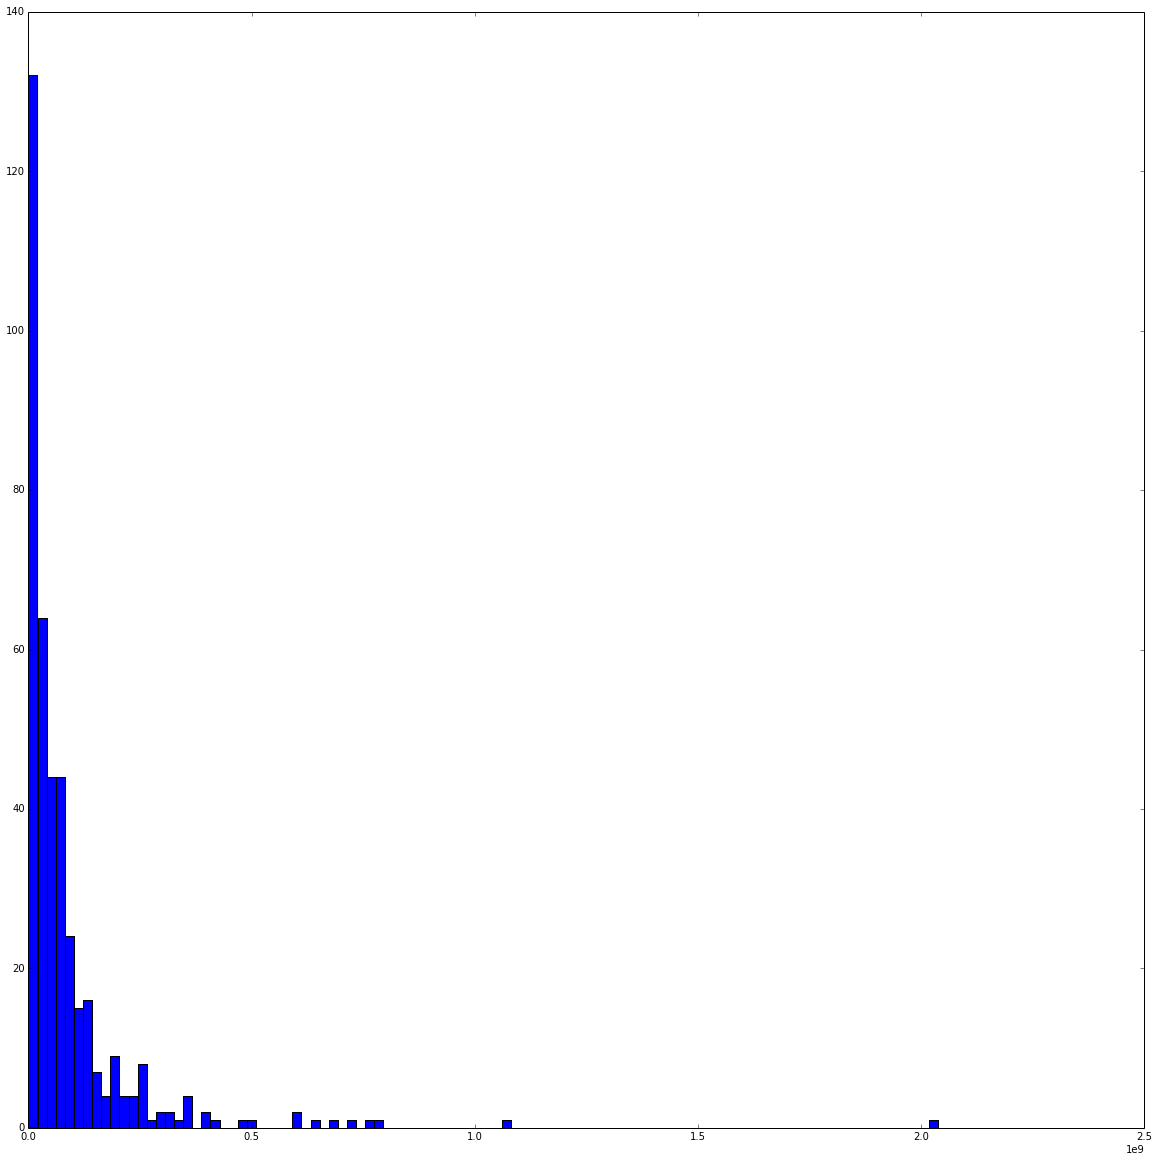

In [188]:
plt.figure(figsize=(20, 20))    

#plt.plot(range(len(validation_revenue)), validation_revenue, 'o', ms=6, color='blue', label='Actual')
#plt.plot(range(len(gbr_validation_revenue_pred)), gbr_validation_revenue_pred, 'o', ms=6, color='red', label='Predicted')
#plt.plot(range(len(validation_revenue)), abs(validation_revenue - gbr_validation_revenue_pred), 'o', ms=6, color='blue', label='Actual')
data = abs(validation_revenue - gbr_validation_revenue_pred)

plt.hist(data, bins=100)

#plt.xlabel('Movie')
#plt.ylabel('Revenue')
#plt.legend()
plt.show()
plt.savefig('residuals.png')


# Interface Functions

### Get associated topic scores for input plot 

### Get prediction array for input movie  

### Get predicted revenue for input movie 